<a href="https://colab.research.google.com/github/Danika-Balas/msds-462/blob/master/A3_GCP_VisionAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Google Cloud Platform Vision API

In [1]:
!pip install google.cloud.vision

     |████████████████████████████████| 460kB 2.6MB/s 
     |████████████████████████████████| 501kB 5.7MB/s 
     |████████████████████████████████| 92kB 5.0MB/s 
     |████████████████████████████████| 276kB 7.7MB/s 
     |████████████████████████████████| 122kB 8.8MB/s 
     |████████████████████████████████| 1.2MB 8.7MB/s 
     |████████████████████████████████| 153kB 18.2MB/s 
     |████████████████████████████████| 266kB 15.9MB/s 
  Created wheel for proto-plus: filename=proto_plus-1.10.0-cp36-none-any.whl size=36998 sha256=befb131a68c56637e9b50caa56fc6ad9db8b40f9d91cc4ad7f4e785f3315e25f
  Stored in directory: /root/.cache/pip/wheels/c9/86/cf/5eb01c0c9a7681a03d0287bcd7915d3a993faa888c058604b1
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=39d07d3d0fdfdd607cdfac0145e86697065ff8506afb210d79eac3b9edb92d5e
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
  Created wheel for idna

# Setup

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import os

from PIL import Image

from google.cloud import vision
from google.oauth2 import service_account
import io

# Set credentials

In [32]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/a3-cloudvisionapi-cf73f97c93e7.json'

# Define images

In [33]:
image1 = '/content/chameleon_hand.jpg'
image2 = '/content/chameleon_bug.jpg'
image3 = '/content/chameleon_handbug.jpeg'

# Annotate images

In [45]:
def detect_labels(path):
    """Detects labels in the file."""
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.label_detection(image=image)
    labels = response.label_annotations
    print('Labels:')

    for label in labels:
        print(f'Class: {label.description}, Confidence: {round(label.score, 3)}' )

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

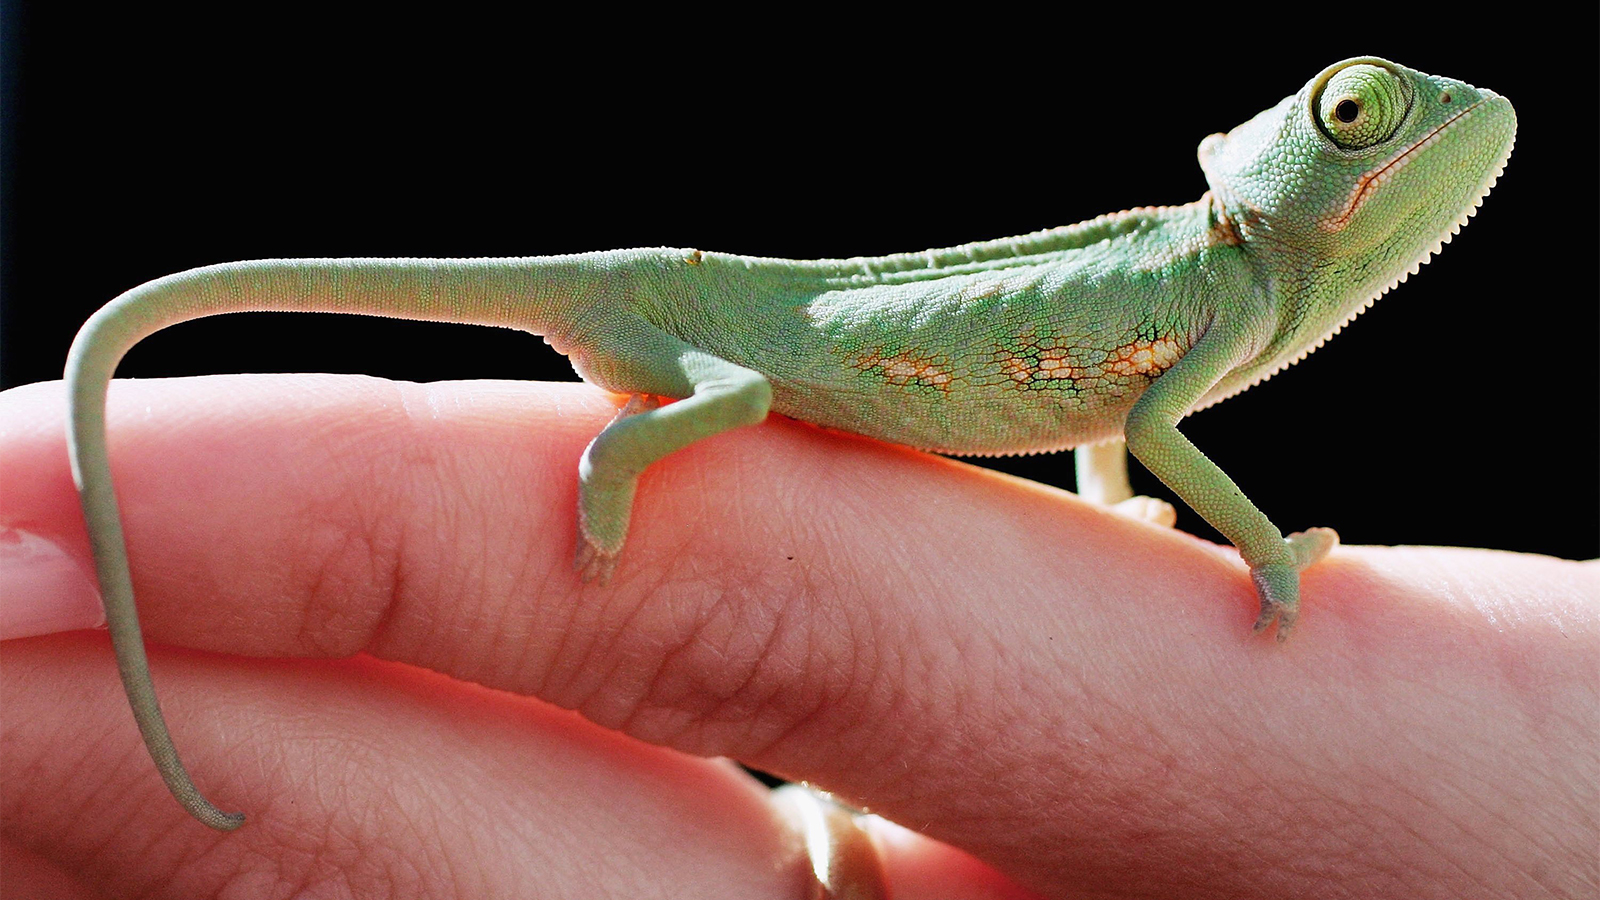

In [34]:
#Show image
Image.open(image1)

In [46]:
# Get labels
detect_labels(image1)

Labels:
Class: Reptile, Confidence: 0.994
Class: Lizard, Confidence: 0.988
Class: Scaled reptile, Confidence: 0.954
Class: Iguania, Confidence: 0.95
Class: Common chameleon, Confidence: 0.941
Class:  Anole, Confidence: 0.94
Class: European green lizard, Confidence: 0.91
Class: Anole, Confidence: 0.9
Class: Chameleon, Confidence: 0.88
Class: Gecko, Confidence: 0.826


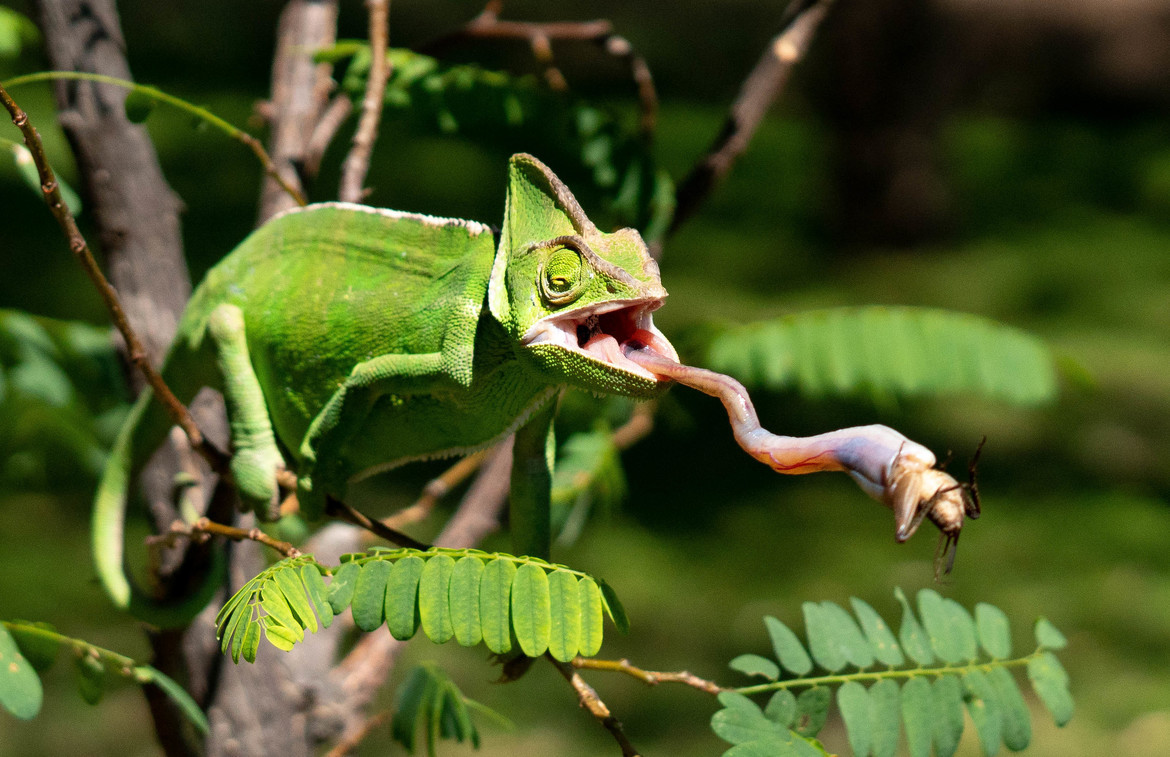

In [35]:
Image.open(image2)

In [47]:
detect_labels(image2)

Labels:
Class: Leaf, Confidence: 0.923
Class: Green, Confidence: 0.907
Class: Natural environment, Confidence: 0.871
Class: Chameleon, Confidence: 0.807
Class: Adaptation, Confidence: 0.791
Class: Plant, Confidence: 0.753
Class: Branch, Confidence: 0.749
Class: Organism, Confidence: 0.715
Class: Reptile, Confidence: 0.711
Class: Terrestrial plant, Confidence: 0.689


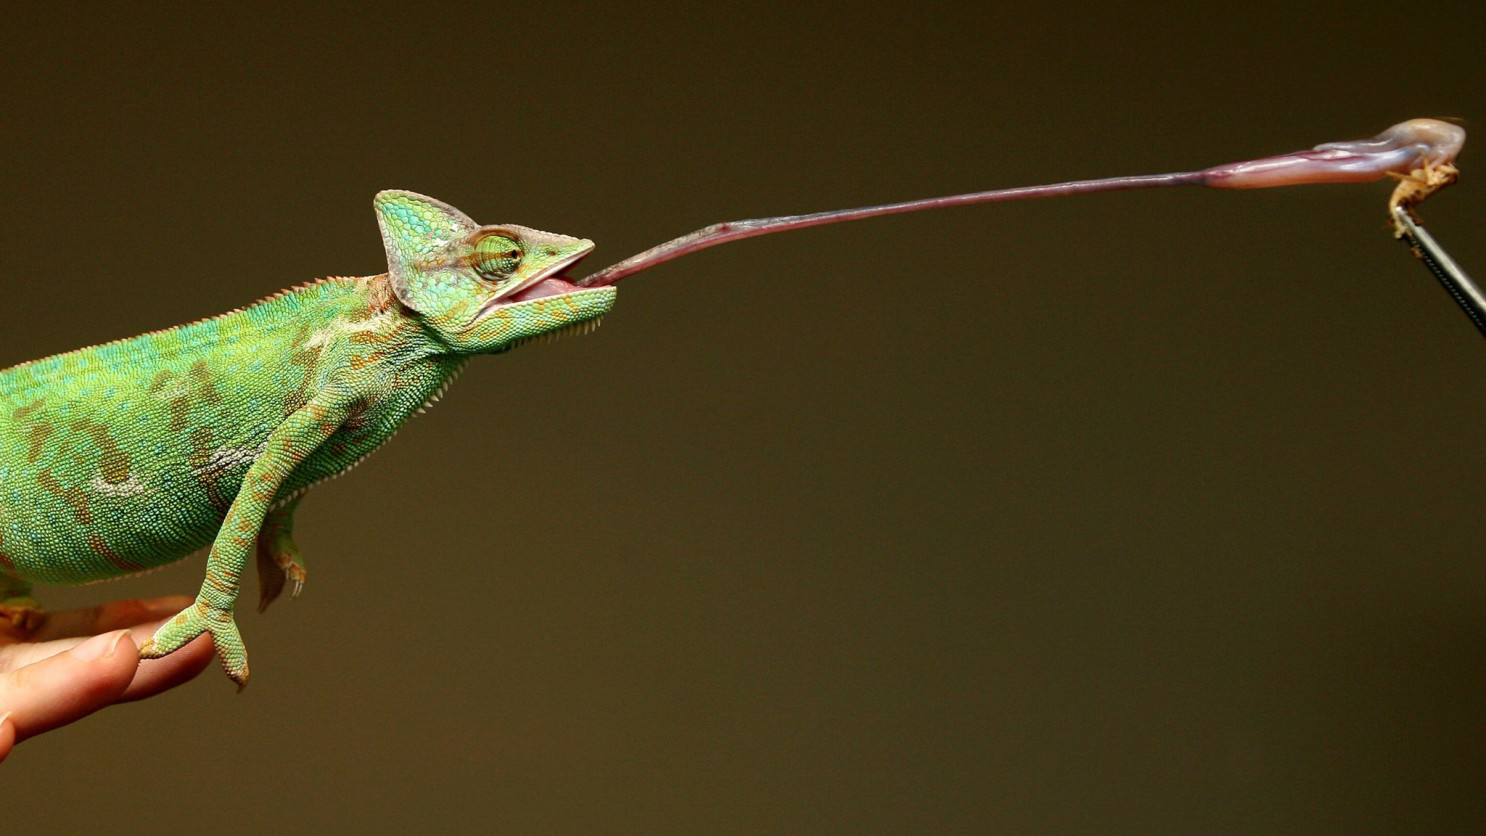

In [36]:
Image.open(image3)

In [48]:
detect_labels(image3)

Labels:
Class: Chameleon, Confidence: 0.973
Class: Common chameleon, Confidence: 0.958
Class: Lizard, Confidence: 0.937
Class: Green, Confidence: 0.935
Class: Reptile, Confidence: 0.915
Class: Iguania, Confidence: 0.902
Class: Scaled reptile, Confidence: 0.794
Class: Macro photography, Confidence: 0.686
Class: Anole, Confidence: 0.67
Class:  Anole, Confidence: 0.624
